<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 20: Decisions and Uncertainty

Associated Textbook Sections: [11.3, 11.4](ccsf-math-108.github.io/textbook/chapters/11/3/Decisions_and_Uncertainty.html)

---

## Outline

* [Decisions and Uncertainty](#Decisions-and-Uncertainty)
* [Review: Terminology](#Review:-Terminology)
* [A Low Midterm Average](#A-Low-Midterm-Average)
* [Statistical Significance](#Statistical-Significance)
* [How We’ve Tested Thus Far](#How-We’ve-Tested-Thus-Far)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Decisions and Uncertainty

---

### Incomplete Information

* We are trying to choose between two views of the world, based on data in a sample.
* It is not always clear whether the data are consistent with one view or the other.
* Random samples can turn out quite extreme. It is unlikely, but possible.

---

## Review: Terminology

---

### Testing Hypotheses

* A test chooses between two views of how data were generated
* The views are called hypotheses
* The test picks the hypothesis that is better supported by the observed data


---

### Null and Alternative

The method only works if we can simulate data under one of the hypotheses.
* Null hypothesis:
    * A well defined chance model about how the data were generated
    * We can simulate data under the assumptions of this model – “under the null hypothesis”
* Alternative hypothesis: A different view about the origin of the data


---

### Test Statistic

* The statistic that we choose to simulate, to decide between the two hypotheses
* Questions before choosing the statistic:
    * What values of the statistic will make us lean towards the null hypothesis?
    * What values will make us lean towards the alternative? Preferably, the answer should be just "high". Try to avoid "both high and low".


---

### Prediction Under the Null Hypothesis

* Simulate the test statistic under the null hypothesis; draw the histogram of the simulated values
* This displays the **empirical distribution of the statistic under the null hypothesis**
* It is a prediction about the statistic, made by the null hypothesis
    * It shows all the likely values of the statistic
    * Also how likely they are (**if the null hypothesis is true**)
* The probabilities are approximate, because we can't generate all the possible random samples


---

### Conclusion of the Test

* Resolve choice between null and alternative hypotheses
    * Compare the **observed test statistic** and its empirical distribution under the null hypothesis
    * If the observed value is **not consistent** with the distribution, then the test favors the alternative ("data is more consistent with the alternative")
* Whether a value is consistent with a distribution:
    * A visualization may be sufficient
    * If not, there are conventions about "consistency"

---

## A Low Midterm Average

---

### The Set Up

* Large(-ish) Data Science class divided into 12 discussion sections
* After the midterm, students in Section 3 notice that the average score in their section is lower than in others

---

### The Instructor's Defense

* Section 3 Instructor's position (Null Hypothesis): If we had picked my section at random from the whole class, we could have got an average like this one.
* Alternative Hypothesis: No, the average score is too low. Randomness is not the only reason for the low scores.


---

### Demo: A Low Midterm Average

* Load the `scores_by_section.csv` data, identify the average Midterm score for each section, make sure to store the value of the Section 3 average Midterm score.
* Randomly sample 27 students (same as section 3) from the population (without replacement) and compute the sample average Midterm score.
* Simulate one value of the test statistic under the hypothesis that the section is like a random sample from the class.
* Simulate 50,000 copies of the test statistic and compare the simulated distribution of the statistic and the actual observed statistic.
* Visualize the distribution.
* Calculate the area in the left tail of the histogram.

In [ ]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [ ]:
scores.group("Section")

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [ ]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [ ]:
observed_average = (scores.group('Section', np.average)
                          .where('Section', 3)
                          .column('Midterm average')
                          .item(0))
observed_average

13.666666666666666

In [ ]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
11,25
3,16
1,13
6,11
6,17
2,11
7,11
1,13
7,25
7,11


In [ ]:
np.average(random_sample.column('Midterm'))

14.777777777777779

In [ ]:
def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [ ]:
random_sample_midterm_avg()

16.962962962962962

In [ ]:
sample_averages = make_array()

for _ in np.arange(50_000):
    random_sample_average = random_sample_midterm_avg()
    sample_averages = np.append(sample_averages, random_sample_average)

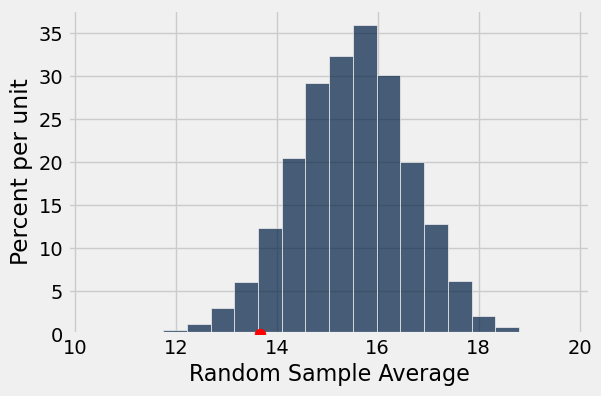

In [ ]:
averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plt.scatter(observed_average, 0, color = 'red', s=60, zorder=3)
plt.show()

In [ ]:
area_in_left_tail = sum(sample_averages <= observed_average) / 50000
area_in_left_tail

0.05738

---

## Statistical Significance

---

### Tail Areas

<img src="./tail_areas.png" alt="comparison of distributions" width=80%>

---

### Conventions About Inconsistency

* "Inconsistent with the null": The test statistic is in the tail of the empirical distribution under the null hypothesis
* "In the tail," first convention:
    * The area in the tail is less than 5%
    * The result is "statistically significant"
* "In the tail," second convention:
    * The area in the tail is less than 1%
    * The result is "highly statistically significant"


---

### Demo: Conventions About Inconsistency

Using the fact that 5% of 50,000 is 2500, identify the 2500th data value in the sorted (ascending) table of averages.

Visualize the distribution of sample averages along with a vertical line marking the 2500th data value.

In [ ]:
0.05 * 50_000

2500.0

In [ ]:
five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

13.592592592592593

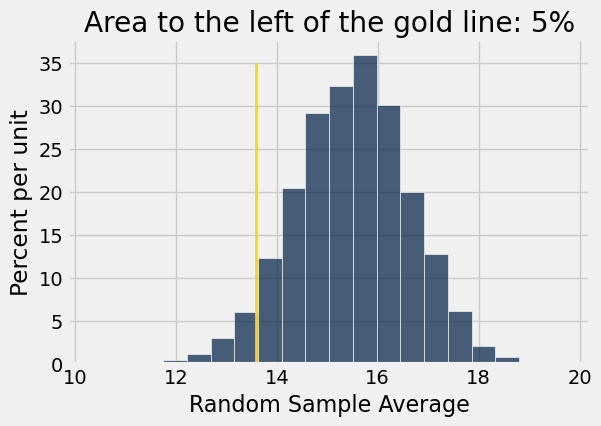

In [ ]:
averages_tbl.hist(bins = 20)
plt.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plt.title('Area to the left of the gold line: 5%');

---

### The P-Value as an Area

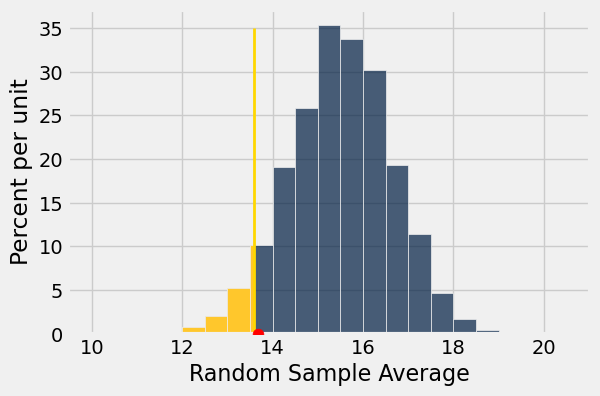

In [ ]:
averages_tbl.hist(bins = np.arange(10, 21, 0.5), right_end=five_percent_point)
plt.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plt.scatter(observed_average, 0, color = 'red', s=60, zorder=3);

* Empirical distribution of the test statistic under the null hypothesis
* The red dot is the observed statistic.
* The P-value is represented by the shaded region of the histogram determined by the definition of the alternative hypothesis.

---

### Definition of the P-value

* The P-value is the chance,
    * under the null hypothesis,
    * that the test statistic
    * is equal to the value that was observed in the data
    * or is even further in the direction of the alternative.
* Also known as the observed significance level


---

### Demo: Calculating the P-value

Calculate the P-value using the distribution of simulated statistics.

In [ ]:
averages_tbl

Random Sample Average
16.8519
16.2222
16.0741
15.6296
16.7407
14.5556
14.8889
15.2593
16.037
16.963


In [ ]:
observed_average

13.666666666666666

In [ ]:
p_value = np.count_nonzero(averages_tbl.column(0) <= observed_average) / averages_tbl.num_rows
p_value

0.05738

---

## How We’ve Tested Thus Far

---

### Hypothesis Testing Review

* One Category (*ex: percent of flowers that are purple*)
    * Test Statistic (1): `empirical_percentage`
    * Test Statistic (2): `abs(empirical_percentage - null_percentage)`
    * How to Simulate: sample_proportions(n, null_dist)
* Multiple Categories (*ex: ethnicity distribution of jury panel*)
    * Test Statistic: `tvd(empirical_dist, null_dist)`
    * How to Simulate: `sample_proportions(n, null_dist)`
* Numerical Data (*ex: scores in a lab section*)
    * Test Statistic: `empirical_mean`
    * How to Simulate: `population_data.sample(n, with_replacement=False)`

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>